In [4]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 45.9 MB/s eta 0:00:00


In [5]:
!pip show konlpy
!pip show wordcloud

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: /usr/local/lib/python3.8/dist-packages
Requires: JPype1, lxml, numpy
Required-by: 
Name: wordcloud
Version: 1.8.2.2
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: Andreas Mueller
Author-email: t3kcit+wordcloud@gmail.com
License: MIT
Location: /usr/local/lib/python3.8/dist-packages
Requires: matplotlib, numpy, pillow
Required-by: 


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud

In [ ]:
df=pd.read_table('/content/ratings_train.txt')
df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [ ]:
print(df['id'].nunique())
print(df.isnull().sum())

150000
id          0
document    5
label       0
dtype: int64


In [ ]:
df = df.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(df.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
df['document'] = df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
...,...,...,...
149995,6222902,인간이 문제지 소는 뭔죄인가,0
149996,8549745,평점이 너무 낮아서,1
149997,9311800,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다,0
149998,2376369,청춘 영화의 최고봉방황과 우울했던 날들의 자화상,1


In [ ]:
temp_list=[]

for sentence in df['document']:
 s_list=okt.pos(sentence)
 for word,tag in s_list:
   if tag in ['Noun','Adjective']:
     temp_list.append(word)
counts=collections.Counter(temp_list)
tag=counts.most_common(50)
tag

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(font_path=font_path,background_color='skyblue', max_font_size=60)
cloud=wc.generate_from_frequencies(dict(tag))
cloud

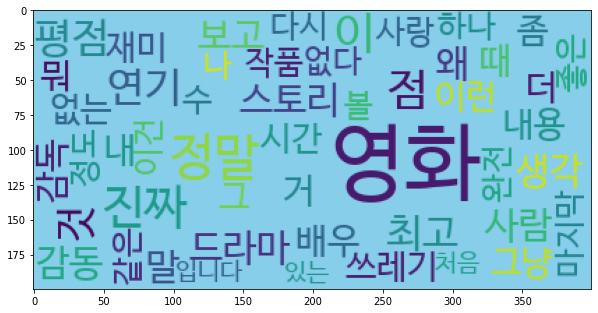

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(cloud)

In [ ]:
temp_list=[]
stopword=['점','정말','왜','말','그','없다','정도','걸','뭐','이건','영화','완전','좀','있는','거','나','이','볼','입니다','것','이런','더','수','때']
for sentence in df['document']:
 s_list=okt.pos(sentence)
 for word,tag in s_list:
   if word not in stopword:
    if tag in ['Noun','Adjective']:
      temp_list.append(word)
counts=collections.Counter(temp_list)
tag=counts.most_common(50)
tag

[('진짜', 8338),
 ('연기', 6328),
 ('평점', 6315),
 ('최고', 6040),
 ('스토리', 5335),
 ('생각', 5315),
 ('드라마', 5063),
 ('감동', 4881),
 ('사람', 4837),
 ('보고', 4665),
 ('배우', 4291),
 ('내', 4133),
 ('감독', 4118),
 ('재미', 3921),
 ('시간', 3888),
 ('내용', 3814),
 ('그냥', 3758),
 ('쓰레기', 3564),
 ('없는', 3486),
 ('작품', 2980),
 ('사랑', 2943),
 ('하나', 2818),
 ('다시', 2816),
 ('마지막', 2757),
 ('좋은', 2663),
 ('같은', 2554),
 ('처음', 2453),
 ('장면', 2425),
 ('액션', 2397),
 ('주인공', 2376),
 ('최악', 2275),
 ('돈', 2196),
 ('이야기', 2174),
 ('지금', 2173),
 ('별로', 2132),
 ('느낌', 2093),
 ('임', 2090),
 ('연출', 2076),
 ('없고', 2059),
 ('명작', 2041),
 ('듯', 2040),
 ('끝', 2039),
 ('역시', 1994),
 ('년', 1991),
 ('개', 1944),
 ('재밌게', 1913),
 ('이해', 1898),
 ('안', 1843),
 ('이영화', 1816),
 ('또', 1781)]

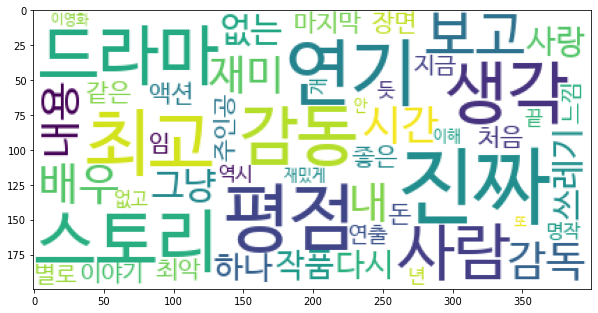

In [ ]:
! apt-get install fonts-nanum
font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc=WordCloud(font_path=font_path,background_color='white', max_font_size=60)
cloud=wc.generate_from_frequencies(dict(tag))

plt.figure(figsize=(10,8))
plt.imshow(cloud)

실습12-2

In [7]:
from konlpy.tag import Okt
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
dict_df=pd.read_csv('/content/comment_rank.csv')


In [8]:
dict_df.head()

,Unnamed: 0,movie,comment,rank
0,0,언포기버블,영화의 단조로운 스토리를 긴장감있,10
1,1,인질,납치범 대가리가 영화 다조지네;; 집중이안되네..,6
2,2,롱 리브 더 킹: 목포 영웅,NaN,10
3,3,싱크홀,싱크홀 별로라는 말이 많던데 그래도 제가 좋아하는 장르에 배우분들도 좋아하는 분들이...,10
4,4,아수라,찢었다...모든게 찢었다.,10


In [9]:
dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  990 non-null    int64 
 1   movie       990 non-null    object
 2   comment     891 non-null    object
 3   rank        990 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 31.1+ KB


In [10]:
dict_df['movie'].unique()

array(['언포기버블', '인질', '롱 리브 더 킹: 목포 영웅', '싱크홀', '아수라', '고양이 집사', '비바리움',
       '어메이징 스파이더맨', '미드소마', '서복', '매트릭스'], dtype=object)

In [ ]:
#dict_df.to_csv("comment_rank.csv")

In [11]:
dict_df.groupby('movie')['rank'].mean()

movie
고양이 집사              8.678947
롱 리브 더 킹: 목포 영웅    10.000000
매트릭스               10.000000
미드소마                9.285714
비바리움                9.095238
서복                  9.319149
싱크홀                 9.838384
아수라                 9.616162
어메이징 스파이더맨          9.711538
언포기버블               7.535354
인질                  9.534884
Name: rank, dtype: float64

In [12]:
temp=dict_df.groupby('movie')['comment'].count()

In [13]:
temp

movie
고양이 집사             190
롱 리브 더 킹: 목포 영웅      0
매트릭스                 8
미드소마                84
비바리움                84
서복                  47
싱크홀                 99
아수라                 99
어메이징 스파이더맨          52
언포기버블               99
인질                 129
Name: comment, dtype: int64

In [14]:
cat_df=dict_df[dict_df.movie=='고양이 집사']


In [15]:
cat_df

,Unnamed: 0,movie,comment,rank
5,5,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,10
6,6,고양이 집사,너무 사랑스런 고양이와 따뜻한 사람들의 이야기를 보며 감동 만,8
15,15,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,10
16,16,고양이 집사,너무 사랑스런 고양이와 따뜻한 사람들의 이야기를 보며 감동 만,8
25,25,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,10
...,...,...,...,...
949,949,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,9
959,959,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,9
969,969,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,9
979,979,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,9


In [ ]:
!pip install konlpy

!pip install wordcloud

     |████████████████████████████████| 127 kB 30.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.7
    Uninstalling urllib3-1.26.7:
      Successfully uninstalled urllib3-1.26.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.1.0 requires urllib3[secure]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [18]:
temp_list=[]
for sentence in cat_df['comment']:
 s_list=okt.pos(sentence)
 for word,tag in s_list:
   if tag in ['Noun','Adjective']:
     temp_list.append(word)
counts=collections.Counter(temp_list)
tag=counts.most_common(50)
tag

[('아이', 198),
 ('감동', 190),
 ('사람', 190),
 ('방금', 99),
 ('깊게', 99),
 ('우리나라', 99),
 ('독일', 99),
 ('동물보호법', 99),
 ('강화', 99),
 ('더', 99),
 ('이상', 99),
 ('없기를', 99),
 ('길위', 99),
 ('모두', 99),
 ('손길', 99),
 ('행복하기를', 99),
 ('영화', 99),
 ('세상', 99),
 ('듯', 99),
 ('좋', 99),
 ('은', 99),
 ('계시다면', 99),
 ('얼마나', 99),
 ('좋을까요', 99),
 ('출연', 99),
 ('냥', 99),
 ('모든', 99),
 ('복', 99),
 ('행복하세요', 99),
 ('덕분', 99),
 ('마음', 99),
 ('사랑스런', 91),
 ('고양이', 91),
 ('따뜻한', 91),
 ('이야기', 91),
 ('만', 91)]

In [19]:
tag_dic={}

for k,v in tag:
  tag_dic[k]=v

In [20]:
tag_dic

{'아이': 198,
 '감동': 190,
 '사람': 190,
 '방금': 99,
 '깊게': 99,
 '우리나라': 99,
 '독일': 99,
 '동물보호법': 99,
 '강화': 99,
 '더': 99,
 '이상': 99,
 '없기를': 99,
 '길위': 99,
 '모두': 99,
 '손길': 99,
 '행복하기를': 99,
 '영화': 99,
 '세상': 99,
 '듯': 99,
 '좋': 99,
 '은': 99,
 '계시다면': 99,
 '얼마나': 99,
 '좋을까요': 99,
 '출연': 99,
 '냥': 99,
 '모든': 99,
 '복': 99,
 '행복하세요': 99,
 '덕분': 99,
 '마음': 99,
 '사랑스런': 91,
 '고양이': 91,
 '따뜻한': 91,
 '이야기': 91,
 '만': 91}

In [21]:
! apt-get install fonts-nanum
font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,166 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 128208 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [22]:

!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [23]:

wc = WordCloud(font_path=font_path, background_color='white',max_font_size=60)

cloud=wc.generate_from_frequencies(tag_dic)

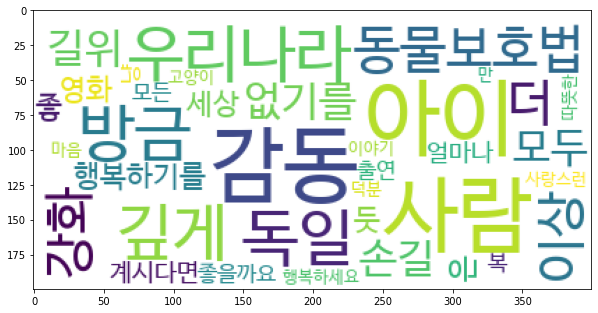

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(cloud)